### Data accessing

The database.rds file was accessed using R software to ascertain the data type. The rasters were then exported to a jupyter-notebook working directory. Below, I show the lines of code used in R

### Import Libraries

In [6]:
import pystac
import rioxarray
import numpy as np
from scipy.stats import pearsonr

### Load Data and visualize

In [2]:
#Load Consecutive dry days data and check its attributes
CDD = rioxarray.open_rasterio("CDD.tif", masked=True)
CDD

<xarray.DataArray (band: 1, y: 195, x: 161)>
[31395 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 33.93 33.98 34.03 34.08 ... 41.78 41.83 41.88 41.93
  * y            (y) float64 5.025 4.975 4.925 4.875 ... -4.575 -4.625 -4.675
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:           Area
    STATISTICS_COVARIANCES:  166.1389789326572
    STATISTICS_MAXIMUM:      79
    STATISTICS_MEAN:         45.932239920097
    STATISTICS_MINIMUM:      8
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       12.889491026905
    scale_factor:            1.0
    add_offset:              0.0

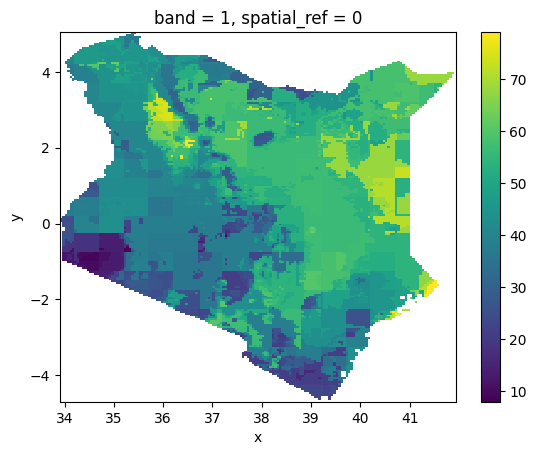

In [3]:
#Plot CDD to visualize the data
CDD.plot(vmin=8, vmax=79)

In [4]:
#Load Total number of conflict events data and check its attributes
EVENTS_rfsi = rioxarray.open_rasterio("EVENTS_rfsi.tif", masked=True)
EVENTS_rfsi

<xarray.DataArray (band: 1, y: 1089, x: 892)>
[971388 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 33.92 33.92 33.93 33.94 ... 41.89 41.9 41.91 41.92
  * y            (y) float64 5.059 5.05 5.041 5.032 ... -4.696 -4.705 -4.714
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  254
    STATISTICS_MEAN:     -9999
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   -9999
    scale_factor:        1.0
    add_offset:          0.0

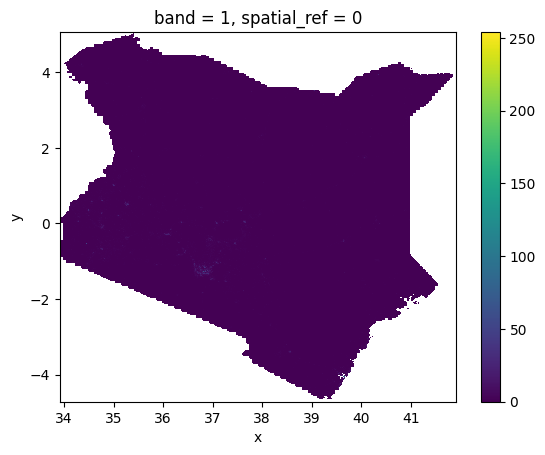

In [5]:
#Plot EVENTS_rfsi to visualize the data
EVENTS_rfsi.plot(vmin=0, vmax=254)

### Correlate data

In [7]:
# resample EVENTS_rfsi to match the shape and size of CDD
resampled_EVENTS_rfsi = EVENTS_rfsi.rio.reproject_match(CDD)

# extract the datasets as numpy arrays
data1 = CDD.values.flatten()
data2 = resampled_EVENTS_rfsi.values.flatten()

# remove any NaN values
valid_mask = ~(np.isnan(data1) | np.isnan(data2))
data1 = data1[valid_mask]
data2 = data2[valid_mask]

# calculate the Pearson correlation coefficient
correlation, pvalue = pearsonr(data1, data2)

print("Correlation coefficient:", correlation)
print("p-value:", pvalue)

Correlation coefficient: -0.0799543739479
p-value: 3.454356005031855e-28
